Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 260s 822ms/step - accuracy: 0.6526 - loss: 0.6024 - val_accuracy: 0.8432 - val_loss: 0.3654
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 280s 894ms/step - accuracy: 0.8775 - loss: 0.3063 - val_accuracy: 0.8652 - val_loss: 0.3585
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 322s 894ms/step - accuracy: 0.9005 - loss: 0.2505 - val_accuracy: 0.8594 - val_loss: 0.3482
782/782 ━━━━━━━━━━━━━━━━━━━━ 151s 192ms/step


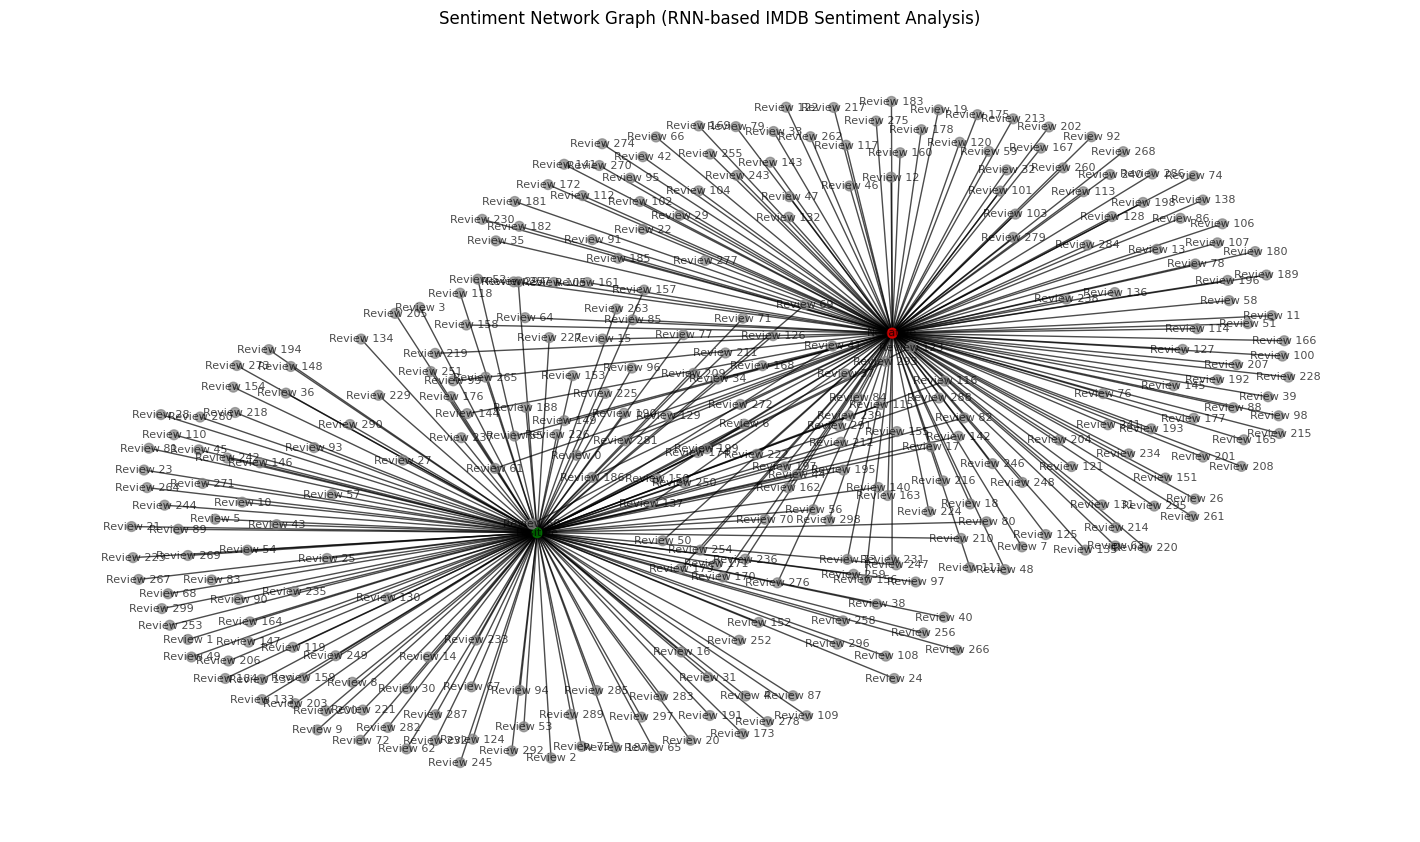

Test Accuracy: 86.32


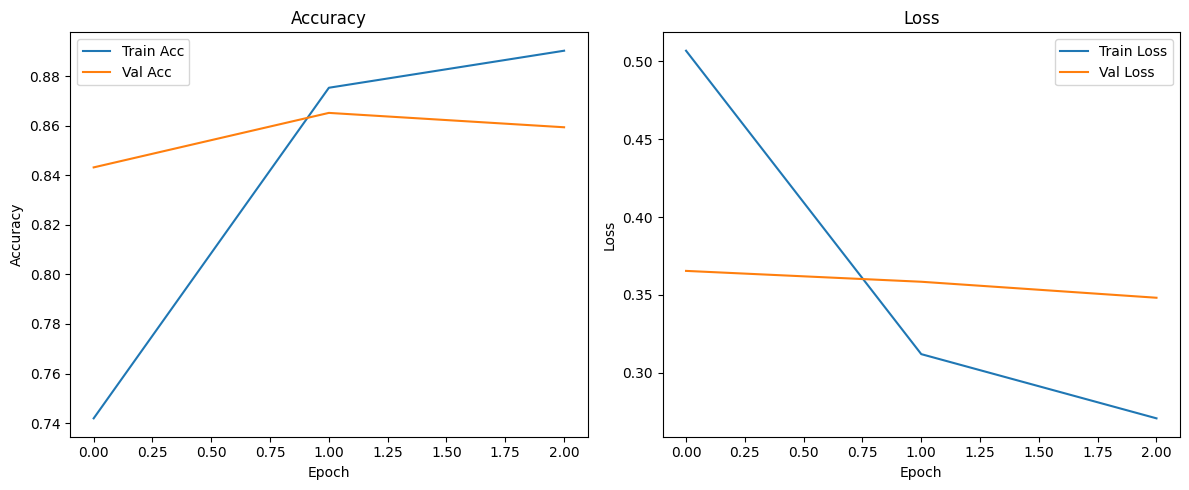

In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Load and preprocess dataset
vocab_size = 5000
max_len = 400
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Build and compile model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_len),
    LSTM(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Predict sentiments
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Create sentiment network graph
G = nx.Graph()
G.add_node('Positive')
G.add_node('Negative')

for i in range(300):  # Limit for clarity
    review_node = f"Review {i}"
    G.add_node(review_node)
    sentiment = 'Positive' if y_pred[i] == 1 else 'Negative'
    G.add_edge(review_node, sentiment)

# Node coloring
colors = ['green' if node == 'Positive' else 'red' if node == 'Negative' else 'gray' for node in G.nodes]

# Draw graph
plt.figure(figsize=(14, 8))
pos = nx.spring_layout(G, k=0.35)
nx.draw(G, pos, with_labels=True, node_size=50, node_color=colors, font_size=8, alpha=0.7)
plt.title("Sentiment Network Graph (RNN-based IMDB Sentiment Analysis)")
plt.axis('off')
plt.show()

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
